In [1]:
# Load the CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
# Split the data between the test and training sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)


Verify if the data is loaded correctly by loading and plotting the first image of every class

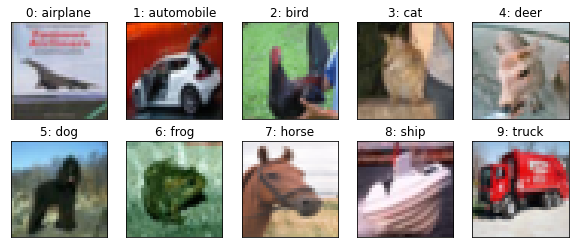

In [3]:
import matplotlib.pyplot as plt
import numpy as np

(_, _), (_, labels) = cifar10.load_data()
idx = [3, 6, 25, 46, 58, 85, 93, 99, 108, 133]

clsmap = {0: 'airplane',
          1: 'automobile',
          2: 'bird',
          3: 'cat',
          4: 'deer',
          5: 'dog',
          6: 'frog',
          7: 'horse',
          8: 'ship',
          9: 'truck', 
}

plt.figure(figsize=(10,4))
for i, (img, y) in enumerate(zip(x_test[idx].reshape(10, 32, 32, 3), labels[idx])):
  plt.subplot(2, 5, i+1)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(str(y[0]) + ": " + clsmap[y[0]])
plt.show()


Compile the model

In [4]:
# Importing Keras libraries
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop


Conv2D is a 2-dimentional convolution method. There are some common arguments used in a convolution layer.

1. filters it will refer to the number of the filters to be learned in this particular layer and affect the dimension of the output of the layer.


2. Kernel_size will refer to the size of the filter.


3. strides is defined as the size of the steps that are taken when the filters are sliding across the input. But in convolutional layers, we can take large step which lead to small outputs but also the loss of information.


4. padding='valid' it will refer to the way of dealing with the information in the edges of the convolution result. There are only 2 options which are valid or same and there are no way of achiving the full analytical result.


5. activation = None and it will give the option to include an activation function in the layer if we need one. (e.g. activation = 'relu')

In [6]:
# Dimensionality of input and latent encoded representation
inpt_dim = (32, 32, 3)
inpt_img = Input(shape=inpt_dim)

# Convolution layer
cl1 = Conv2D(64, (9,9), 
             strides=(2,2), 
             input_shape = inpt_dim, 
             activation = 'relu')(inpt_img)

# Pooling and BatchNorm
pl2 = MaxPool2D(pool_size = (2, 2))(cl1)
bnl3 = BatchNormalization()(pl2)

# 2nd Convolution layer
cl4 = Conv2D(128, (3,3), 
             strides=(1,1), 
             activation = 'relu')(bnl3)
pl5 = MaxPool2D(pool_size = (2, 2))(cl4)
bnl6 = BatchNormalization()(pl5)

# Flattening for compatibility
fl7 = Flatten()(bnl6)

# Dense layer + Dropout
dol8 = Dropout(0.5)(fl7)
dl9 = Dense(units = 256, activation = 'relu')(dol8)
dol10 = Dropout(0.5)(dl9)
dl11 = Dense(units = 256, activation = 'relu')(dol10)
dol2 = Dropout(0.5)(dl11)
output = Dense(units = 256, activation = 'sigmoid')(dol2)

classifier = Model(inpt_img, output)


In [7]:
# Compile the model and print a summary
# Compiling the CNN with RMSprop optimizer
opt = RMSprop(learning_rate=0.001)
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
print(classifier.summary())


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        15616     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 2, 2, 128)        